<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Hands-On
---
Hands-On ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

### Daftar Isi :
Membangun Model dan Mengevaluasi Hasil Pemodelan
- Supervised Learning
    - Klasifikasi
    1. Menggunakan machine learning
    2. Menggunakan deep learning
    
- Unsupervised Learning

### Supervised Learning dan Unsupervised Learning

<center>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*H4D11uM2V6wcgK4k.png"  width="300" />
    <figcaption>Ilustrasi Supervised dan Unsupervised Learning</figcaption>
</center>

### Supervised Learning
Supervised learning adalah jenis pembelajaran mesin di mana algoritma diajari menggunakan data yang sudah diberi label. Dalam supervised learning, ada variabel target (variabel dependen) yang ingin diprediksi, dan algoritma dilatih untuk menghubungkan fitur atau atribut yang ada dalam data dengan target yang telah diberikan (variabel independen).

Supervised learning biasanya digunakan untuk dua hal utama :
- Classification
- Regression

Beberapa algoritma supervised learning :
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbours
4. Decision Trees
5. SVM
6. Naive Bayes
7. Neural Networks

### Unsupervised Learning
Unsupervised learning adalah jenis pembelajaran mesin di mana algoritma dilatih dari data yang tidak memiliki label atau target yang jelas. Dalam unsupervised learning, tujuannya adalah menemukan pola, struktur, dan hubungan tersembunyi dalam data tanpa arahan yang eksplisit.

Umumnya unsupervised learning digunakan untuk tiga hal utama:
- Clustering
- Association
- Dimensionality reduction

Salah satu contoh unsupervised Learning algorithms :
1. K-Means

### 1. Membangun Model Supervised Learning dan Mengevaluasi Hasil Pemodelan

---

### 1.1 Supervised Learning dengan Linear Regression, Logistic Regression, dan K-NN

### 1.1.3 K-NN (K-Nearest Neighbors)
-----

K-NN memprediksi kelas yang benar untuk data uji dengan menghitung jarak antara data uji dan semua titik pelatihan. Kemudian, K-NN memilih K titik yang paling dekat dengan data uji.

Misalkan terdapat dua kategori, yaitu Kategori A dan Kategori B, dan kita memiliki titik data baru x1, maka titik data ini akan tergolong dalam kategori apa? Untuk memecahkan jenis masalah seperti ini, kita dapat menggunakan algoritma K-NN. Dengan bantuan K-NN, kita dapat dengan mudah mengidentifikasi kategori atau kelas dari dataset tertentu.

<center>
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*OltO4Txr-D0lPWNL.png"  width="500" />
</center>

In [1]:
# Import Library
import pandas as pd

In [2]:
df = pd.read_csv('delay_maskapai.csv')

In [3]:
# Membuang Kolom "Flight"
df = df.iloc[:,1:]

In [4]:
df.head(3)

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,CO,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0


In [5]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [6]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.160256,0.771084,CO,IAH,PHX,5,0
1,-0.918803,-0.602410,OO,DSM,MKE,2,0
2,-0.117521,1.698795,DL,SEA,CVG,7,0
3,-0.427350,1.433735,WN,SNA,MDW,7,1
4,-0.566239,0.204819,CO,IAH,MCO,6,1


In [7]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [8]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [9]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.160256,0.771084,4,125,199,4,0
1,-0.918803,-0.602410,12,76,170,1,0
2,-0.117521,1.698795,5,235,64,6,0
3,-0.427350,1.433735,15,245,162,6,1
4,-0.566239,0.204819,4,125,160,5,1


In [10]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [11]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [12]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [13]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.555


Pada tahap di atas, kita menerapkan K-Fold Cross-Validation (K-Fold CV) sebagai metode evaluasi model yang digunakan untuk menguji performa model dan mencegah overfitting.

Dalam K-Fold CV, dataset dibagi menjadi K subset (fold) yang hampir sama ukurannya. Pada setiap iterasi, salah satu fold digunakan sebagai data validasi, sedangkan K-1 fold lainnya digunakan sebagai data pelatihan. Proses ini diulangi K kali untuk mendapatkan estimasi performa yang lebih akurat.

Dengan menggunakan K-Fold CV, kita dapat memperoleh estimasi yang lebih akurat tentang kinerja model KNN dengan menggunakan seluruh dataset dan mempertimbangkan variasi yang mungkin dalam pemilihan data pelatihan dan validasi.

In [14]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.547


In [15]:
from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.59      0.61      0.60      1823
     Delayed       0.48      0.46      0.47      1414

    accuracy                           0.55      3237
   macro avg       0.54      0.54      0.54      3237
weighted avg       0.54      0.55      0.55      3237



In [16]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

In [17]:
import matplotlib.pyplot as plt

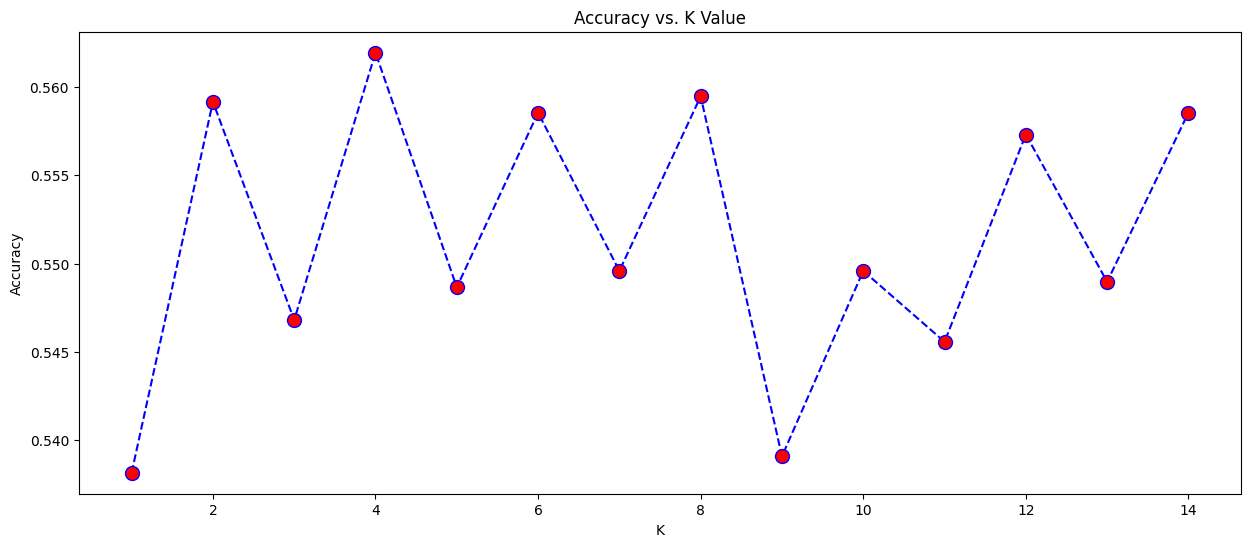

In [18]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 56.19%


In [21]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.58      0.77      0.67      1823
     Delayed       0.50      0.29      0.37      1414

    accuracy                           0.56      3237
   macro avg       0.54      0.53      0.52      3237
weighted avg       0.55      0.56      0.53      3237



In [22]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

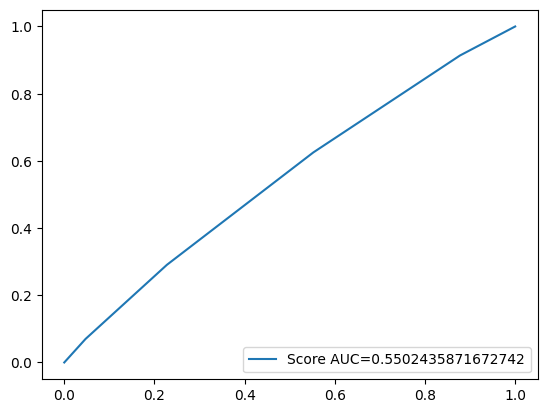

In [23]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi KNN untuk data uji (X_test)
y_pred_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()